In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

statesofInterest = ['IOWA', 'INDIANA', 'ILLINOIS', 'KANSAS', 'MINNESOTA', 'MISSOURI', 'NEBRASKA', 'NORTH DAKOTA', 'SOUTH DAKOTA', 'OHIO']

In [46]:
def crop_yield(year_param):

     # These are the parameters in the API that you choose.
    ploads = {'format': 'JSON',
              'or_desc': 'CROPS',
              'desc': 'SURVERY',
              #'reference_period_desc': 'YEAR',
              'domain_desc': 'TOTAL', 
              'agg_level_desc': 'STATE',
              'state_name': ['IOWA', 'INDIANA', 'ILLINOIS', 'KANSAS', 'MINNESOTA', 'MISSOURI', 'NEBRASKA', 'NORTH DAKOTA', 'SOUTH DAKOTA', 'OHIO'],
              'year__GT': year_param,
              'commodity_desc': 'SOYBEANS',
              'unit_desc': 'BU / ACRE',
              'statisticcat_desc': 'YIELD',
              'prodn_practice_desc': 'ALL PRODUCTION PRACTICES'
              }
    # key (make a parameter)
    r = requests.get("https://quickstats.nass.usda.gov/api/api_GET/?key=1C757E50-5169-30CC-BEFD-40A5C3E2A43D", params=ploads)
    # execute get request
    dt1 = json.dumps(r.json(), indent=2, sort_keys=True)
    # make it json format
    obj1 = json.loads(dt1)

    # collect relevant data for each object created
    dt2 = []
    for i in obj1["data"]:
        dt2.append([i["year"], i["reference_period_desc"],  i["state_name"], i["commodity_desc"], i["Value"], i['unit_desc']])
        #dt2.append([i])
    # convert from dictionary format to pandas
    dt3 = pd.DataFrame.from_dict(dt2)
    return dt3

In [47]:
ts = crop_yield('1800')
ts.to_csv("tmp.csv")

ts.columns = ['Year','Forecast', 'State','Crop', 'Value', 'Unit']
ts.sort_values(['Year', 'State'], inplace=True)
ts.head(10)


Year Forecast     State      Crop Value       Unit
256   1924     YEAR  ILLINOIS  SOYBEANS    12  BU / ACRE
513   1924     YEAR   INDIANA  SOYBEANS   9.9  BU / ACRE
770   1924     YEAR      IOWA  SOYBEANS    12  BU / ACRE
987   1924     YEAR    KANSAS  SOYBEANS    11  BU / ACRE
1491  1924     YEAR  MISSOURI  SOYBEANS   7.5  BU / ACRE
2209  1924     YEAR      OHIO  SOYBEANS  11.5  BU / ACRE
255   1925     YEAR  ILLINOIS  SOYBEANS  13.5  BU / ACRE
512   1925     YEAR   INDIANA  SOYBEANS    10  BU / ACRE
769   1925     YEAR      IOWA  SOYBEANS    14  BU / ACRE
986   1925     YEAR    KANSAS  SOYBEANS    10  BU / ACRE

In [48]:
ts=ts.loc[ts['Forecast'] == "YEAR"] #some values are not final forecasts
ts.set_index('Year', inplace=True)
ts["Value"]=ts["Value"].astype("float")


In [49]:
ts.head()

Forecast     State      Crop  Value       Unit
Year                                               
1924     YEAR  ILLINOIS  SOYBEANS   12.0  BU / ACRE
1924     YEAR   INDIANA  SOYBEANS    9.9  BU / ACRE
1924     YEAR      IOWA  SOYBEANS   12.0  BU / ACRE
1924     YEAR    KANSAS  SOYBEANS   11.0  BU / ACRE
1924     YEAR  MISSOURI  SOYBEANS    7.5  BU / ACRE

In [50]:
#ts.groupby("State").plot("Value")

iowa1 = ts.loc[ts['State'].isin(["IOWA"])]
mich1 = ts.loc[ts['State'].isin(["MINNESOTA"])]
nebr1 = ts.loc[ts['State'].isin(["NEBRASKA"])]

# gg = ts.groupby(['Year', 'State'])['Value'].sum().unstack().plot()  
# gg
#df_me.groupby(['Year', 'Platform'])['Global_Sales'].sum().unstack().plot() 


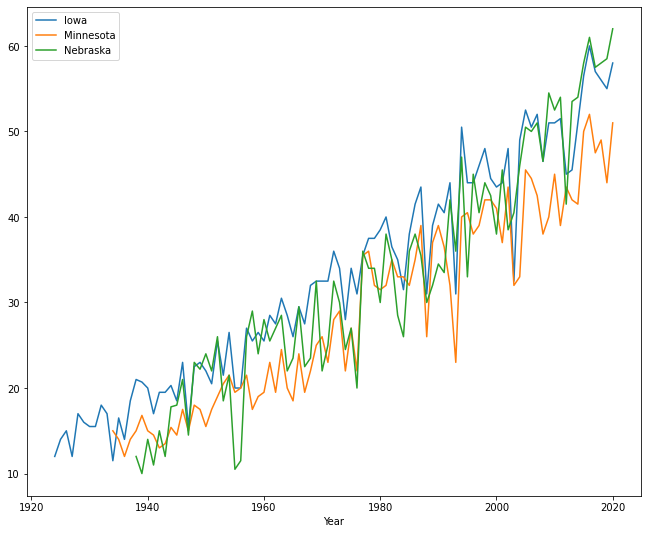

In [51]:
state1= pd.concat([iowa1["Value"], mich1["Value"], nebr1["Value"]], axis=1).sort_index()
state1.columns = ["Iowa", "Minnesota", "Nebraska"]
state1.to_csv("SoybeanStates.csv")

state1.plot( figsize=(11, 9))

In [52]:
ts

Forecast         State      Crop  Value       Unit
Year                                                   
1924     YEAR      ILLINOIS  SOYBEANS   12.0  BU / ACRE
1924     YEAR       INDIANA  SOYBEANS    9.9  BU / ACRE
1924     YEAR          IOWA  SOYBEANS   12.0  BU / ACRE
1924     YEAR        KANSAS  SOYBEANS   11.0  BU / ACRE
1924     YEAR      MISSOURI  SOYBEANS    7.5  BU / ACRE
...       ...           ...       ...    ...        ...
2020     YEAR      MISSOURI  SOYBEANS   53.0  BU / ACRE
2020     YEAR      NEBRASKA  SOYBEANS   62.0  BU / ACRE
2020     YEAR  NORTH DAKOTA  SOYBEANS   36.0  BU / ACRE
2020     YEAR          OHIO  SOYBEANS   58.0  BU / ACRE
2020     YEAR  SOUTH DAKOTA  SOYBEANS   50.0  BU / ACRE

[912 rows x 5 columns]

In [53]:
ts['State'] = ts['State'].str.upper() 
model_allStates_yields = ts[ts['State'].isin(statesofInterest)]
model_allStates_yields.rename(columns = {"Value": "Yield"}, inplace = True)
model_allStates_yields = model_allStates_yields[["State", "Yield"]]
model_allStates_yields.to_csv("data_model_ready/model_allStates_yields.csv")